In [85]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report)

# ___Multi-Class Evaluation___
---------------

In [4]:
# Multi class evaluation is a straightforward extension of the binary use case.
# It will give a collection of true vs predicted binary outcomes -> one per class.
# Confusion matrices are also possible.
# Classification reports.

# Overall metrics are averages across classes.
# There are multiple ways to average multi-class results.
# The support for each class is important to consider, e.g. in the case of imbalanced classes.

# There is also multi-label classification, where each instance may have multiple labels
# e.g. a web page may be labelled -> technology, news and sensational.
# This type is not covered here.

In [5]:
# Multi-class confusion matrix is a straightforward extension of the binary classifier's 2x2 confusion matrix.

In [167]:
digits = load_digits()
train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target)

In [168]:
logReg = LogisticRegression(C = 0.5, max_iter = 10000).fit(train_x, train_y)

In [169]:
logReg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [170]:
logReg.score(test_x, test_y)

0.9622222222222222

In [171]:
preds = logReg.predict(test_x)

In [172]:
cfmat = confusion_matrix(test_y, preds)

In [173]:
np.bincount(test_y)

array([43, 54, 49, 49, 36, 51, 41, 39, 48, 40], dtype=int64)

In [174]:
cfmat

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 45,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  0,  0,  1,  3,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 38]], dtype=int64)

In [175]:
cfmat[0, :]

array([43,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [176]:
np.argmax(cfmat[5, :])

5

In [177]:
cfmat.shape

(10, 10)

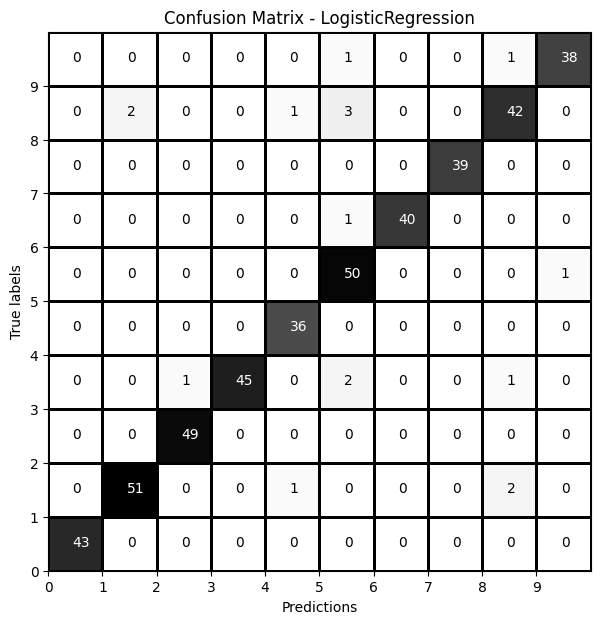

In [178]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.pcolormesh(cfmat, cmap = "binary", edgecolors = "black")

for column in range(0, 10):
    for row in range(0, 10):
        if column == row:
            axes.text(y = row + 0.45, x = column + 0.45, s = cfmat[row, column], color = "white")
        else:
            axes.text(y = row + 0.45, x = column + 0.45, s = cfmat[row, column])

axes.set_xticks(np.arange(0, 10, step = 1))
axes.set_yticks(np.arange(0, 10, step = 1))
axes.set_xlabel("Predictions")
axes.set_ylabel("True labels")
axes.set_title("Confusion Matrix - LogisticRegression")
plt.show()

In [179]:
# All true positives are aligned in the diagonal axis.
# All misclassifications are off the diagonal.

In [180]:
def plot_confusion_matrix(confusion_matrix: npt.NDArray[np.int64], model: str) -> None:
    
    fig, axes = plt.subplots()
    fig.set_size_inches(7, 7)
    axes.pcolormesh(confusion_matrix, cmap = "binary", edgecolors = "black")
    
    for row in range(0, confusion_matrix.shape[0]):
        maxx_offset = np.argmax(confusion_matrix[row, :])
        for column in range(0, confusion_matrix.shape[0]):
            if column == maxx_offset:
                # print(f"(row {row}, column {column})", confusion_matrix[row, :], "->", np.argmax(confusion_matrix[row, :]))
                axes.text(x = column + 0.4, y = row + 0.45, s = confusion_matrix[row, column], color = "white")
            else:
                axes.text(x = column + 0.4, y = row + 0.45, s = confusion_matrix[row, column], color = "black")
    
    axes.set_xticks(ticks = np.arange(0, confusion_matrix.shape[0], step = 1) + 0.5, labels = np.arange(0, confusion_matrix.shape[0], step = 1))
    axes.set_yticks(ticks = np.arange(0, confusion_matrix.shape[0], step = 1) + 0.5, labels = np.arange(0, confusion_matrix.shape[0], step = 1))
    axes.set_xlabel("Predictions")
    axes.set_ylabel("True labels")
    axes.set_title(f"Confusion Matrix - {model}")
    plt.show()

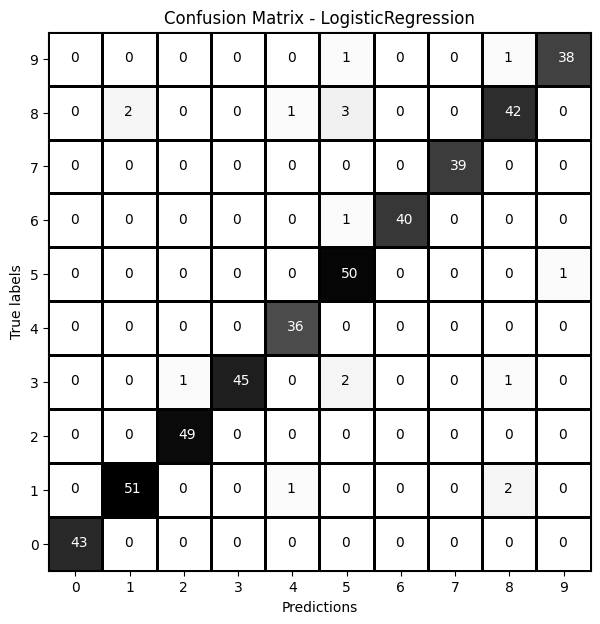

In [181]:
plot_confusion_matrix(confusion_matrix = cfmat, model = "LogisticRegression")

In [182]:
svcLin = SVC(C = 0.05, kernel = "linear").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)

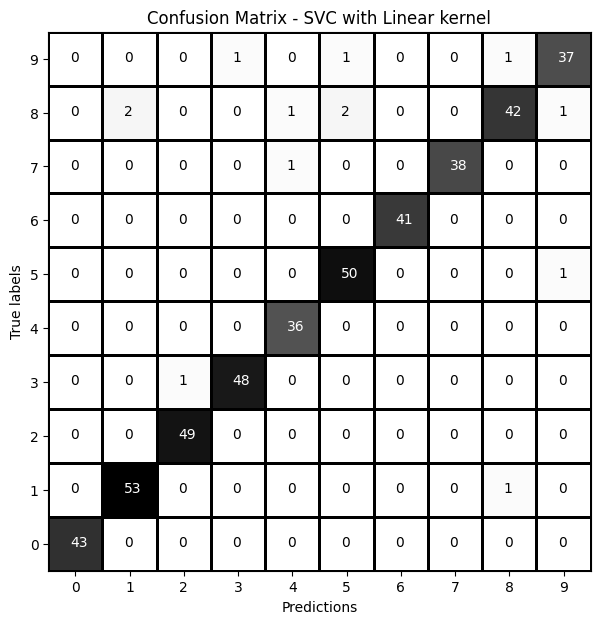

In [183]:
plot_confusion_matrix(svcLin_cfmat, "SVC with Linear kernel")

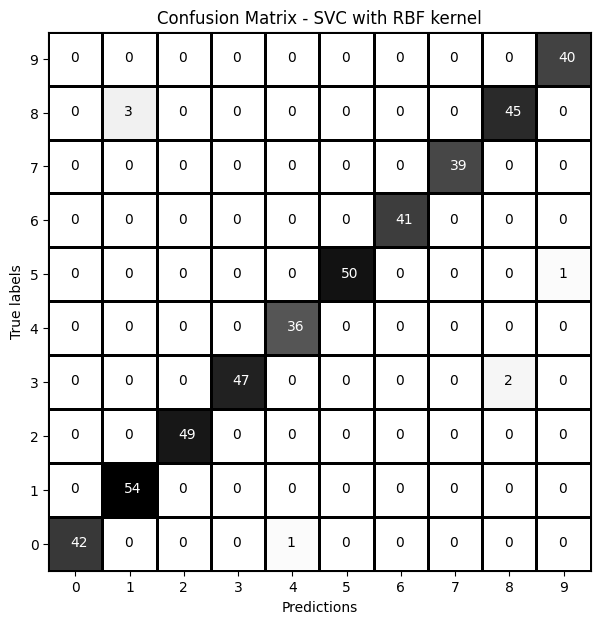

In [184]:
svcLin = SVC(C = 0.5, kernel = "rbf").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)
plot_confusion_matrix(svcLin_cfmat, "SVC with RBF kernel")

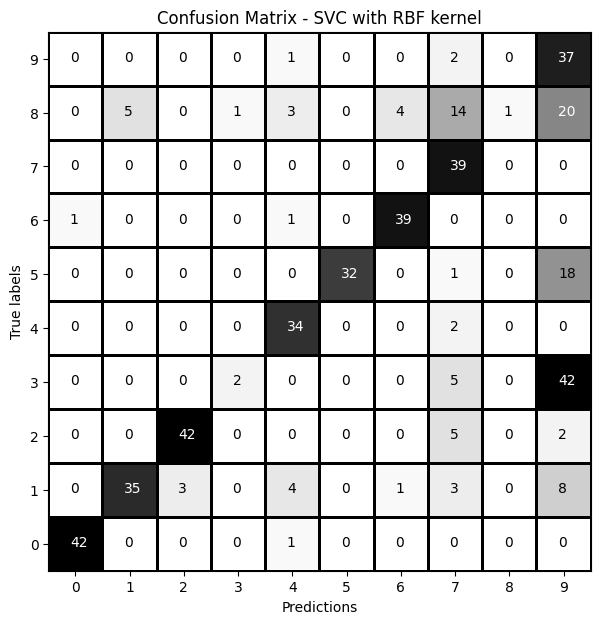

In [185]:
svcLin = SVC(C = 0.02125, kernel = "rbf").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)
plot_confusion_matrix(svcLin_cfmat, "SVC with RBF kernel")

In [186]:
# The above is a really bad classifier.
# Confusion matrices like this can reveal information on where and how these misclassifications occur!

# Many 8s and 2s are misclassified as 1 by the classifier.
# The classifier did not predict any 8s.
# 9 8s were classified as 9s by the classifier.

# Some classes may be more prone to certain types of errors.

In [187]:
print(classification_report(test_y, svcLin.predict(test_x)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.88      0.65      0.74        54
           2       0.93      0.86      0.89        49
           3       0.67      0.04      0.08        49
           4       0.77      0.94      0.85        36
           5       1.00      0.63      0.77        51
           6       0.89      0.95      0.92        41
           7       0.55      1.00      0.71        39
           8       1.00      0.02      0.04        48
           9       0.29      0.93      0.44        40

    accuracy                           0.67       450
   macro avg       0.80      0.70      0.64       450
weighted avg       0.81      0.67      0.63       450



## ___Micro vs Macro Averaging___
----------------

In [188]:
fruits = pd.read_csv("../resources/assets/fruit_data_with_colors.txt", delimiter = "\t")

In [189]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [91]:
# In macro averaging, each class has equal weight.

fruits.fruit_label.value_counts()

fruit_label
1    19
3    19
4    16
2     5
Name: count, dtype: int64

In [98]:
train_x, test_x, train_y, test_y = train_test_split(fruits.loc[:, ["mass", "width", "height"]], fruits.fruit_label, train_size = 0.7)

In [111]:
svc = SVC(kernel = "linear", C = 0.6).fit(train_x, train_y)

In [112]:
svc.score(test_x, test_y)

0.7777777777777778

In [117]:
pred_summary = pd.DataFrame({"PredictedLabel": svc.predict(test_x), "TrueLabel": test_y})
pred_summary["isCorrect"] = pred_summary.PredictedLabel == pred_summary.TrueLabel
pred_summary.reset_index(drop = True, inplace = True)

In [119]:
pred_summary

,PredictedLabel,TrueLabel,isCorrect
0,1,1,True
1,4,4,True
2,2,2,True
3,1,1,True
4,1,1,True
5,1,1,True
6,3,1,False
7,1,3,False
8,4,4,True
9,4,4,True


In [137]:
# Compute the metric for each class.

# Precision = TP / (TP + FP)

pred_summary.query("PredictedLabel == 1") # .isCorrect.mean()

,PredictedLabel,TrueLabel,isCorrect
0,1,1,True
3,1,1,True
4,1,1,True
5,1,1,True
7,1,3,False
16,1,1,True
17,1,3,False


In [143]:
labels = fruits.loc[:, ["fruit_label", "fruit_name"]].drop_duplicates()
labels

,fruit_label,fruit_name
0,1,apple
3,2,mandarin
24,3,orange
43,4,lemon


In [151]:
prec_sum = []

for (label, name) in zip(labels.fruit_label, labels.fruit_name):
    print("Class {} -> Precision {:.4f}".format(name, pred_summary.query("PredictedLabel == @label").isCorrect.mean()))
    prec_sum.append(pred_summary.query("PredictedLabel == @label").isCorrect.mean())

Class apple -> Precision 0.7143
Class mandarin -> Precision 1.0000
Class orange -> Precision 0.5000
Class lemon -> Precision 1.0000


In [153]:
prec_sum

[0.7142857142857143, 1.0, 0.5, 1.0]

In [155]:
# Macro average precision = 

np.mean(prec_sum)

0.8035714285714286

In [190]:
# Micro averages
# Each instance is given an equal weight.
# Largest class has the most influence.

In [191]:
# Aggregate the outcomes across all classes. (no class wise grouping)
# Compute the metric on the aggregate.

In [193]:
pred_summary.isCorrect.mean()

0.7777777777777778

In [194]:
# Summary

In [195]:
# If the feature is made of balanced classes, micro and macro averaging won't make much difference
# If the classes are indeed imbalanced, 
    # If we intend to reduce the influence of larger classes -> use macro averaging
    # If we intend to emphasize the influence of larger classes -> use micro averaging